In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import date
import dill as pickle

from utils.util import getTopLevelPath

In [19]:
today = date.today().strftime('%Y-%m-%d')
stationsLonLatXY_path = getTopLevelPath() + 'data/Measured/stationsLonLatXY.pkl'
outputpath = getTopLevelPath() + f'data/Visualization/png/stationsOverIceland_{today}.png'
with open(stationsLonLatXY_path, 'rb') as f:
    stations = pickle.load(f)

coordinates = [v[:2] for v in stations.values()]

len(coordinates)

412

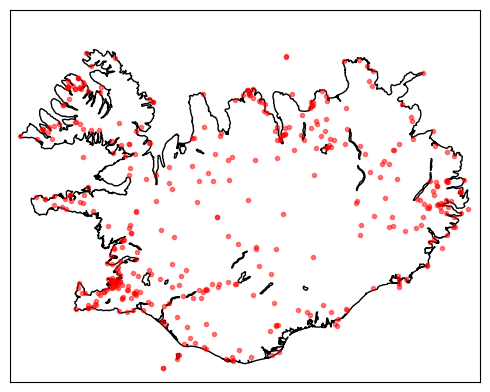

In [20]:
plt.figure(figsize = (5, 5)) 
m = Basemap(projection = 'aea', llcrnrlat=63, urcrnrlat=67, llcrnrlon=-24, urcrnrlon=-13, lat_0 = 65, lon_0=-16, resolution='h')
# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
# Plot coordinates
for lon, lat in coordinates:
    x, y = m(lon, lat)
    m.plot(x, y, 'ro', markersize=3, alpha = 0.5)
# Add title and show the plot
#plt.title('Weather stations around Iceland')
plt.tight_layout()
plt.savefig(outputpath)
plt.show()

In [23]:
min_lon, max_lon = min(coordinates, key = lambda x: x[0])[0], max(coordinates, key = lambda x: x[0])[0]
min_lat, max_lat = min(coordinates, key = lambda x: x[1])[1], max(coordinates, key = lambda x: x[1])[1]

In [24]:
min_lon, max_lon, min_lat, max_lat

(-24.5312, -13.5192, 63.2993, 66.5438)